IMPORTING DATA (TITANIC DATASET FROM KAGGLE)

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
train= pd.read_csv("C:\\Users\\javel\\Downloads\\titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


EDA

<AxesSubplot:>

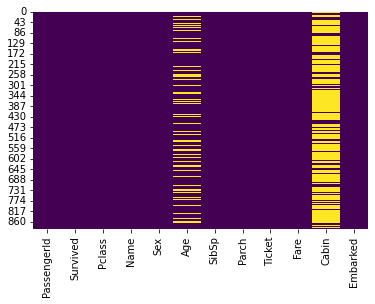

In [5]:
import seaborn as sns
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [6]:
Null_percent_age=train['Age'].isnull().sum()/len(train['Age'])*100
Null_percent_age

19.865319865319865

In [7]:
Null_percent_cabin=train['Cabin'].isnull().sum()/len(train['Cabin'])*100
Null_percent_cabin

77.10437710437711

<AxesSubplot:xlabel='Survived', ylabel='count'>

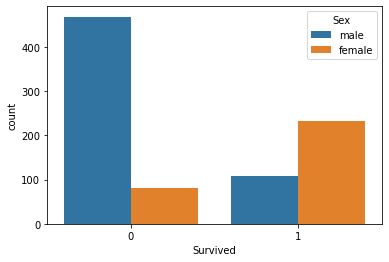

In [8]:
sns.set_style=('Whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

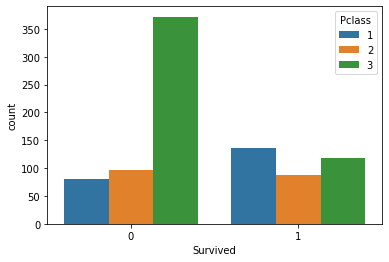

In [9]:
sns.countplot(x='Survived',hue='Pclass', data=train)

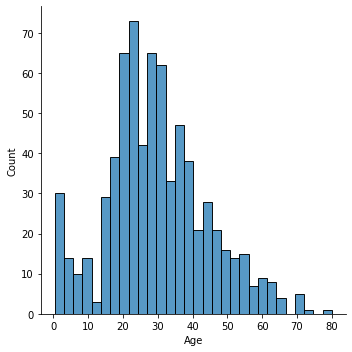

In [10]:
sns.displot(train["Age"].dropna(),kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

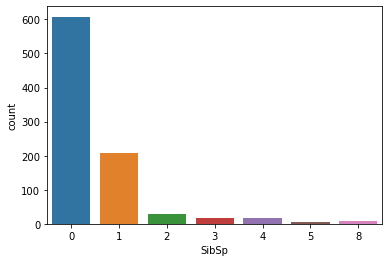

In [11]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

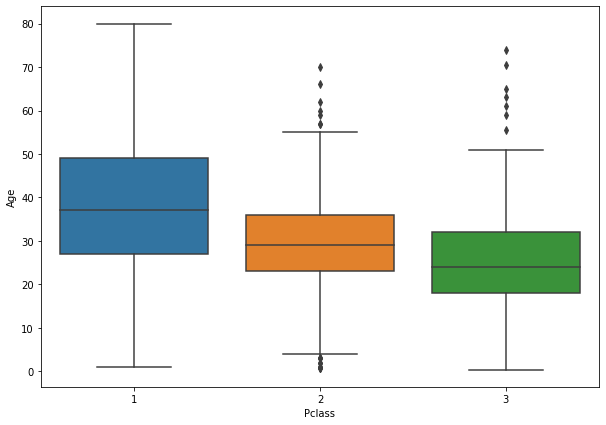

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y="Age",data=train)

IMPUTING MISSING VALUES FOR AGE COLUMN

In [13]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
            
        

In [14]:
    train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

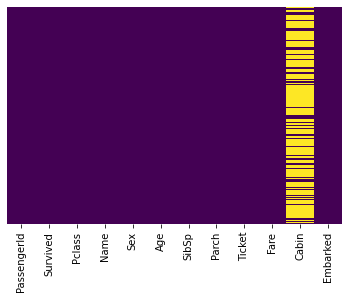

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap="viridis")

DROPPING CABIN COLUMN(TOO MANY MISSING VALUES )

In [16]:
train.drop('Cabin',axis=1, inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

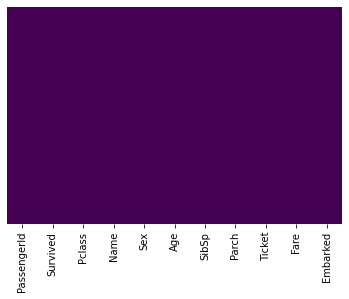

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap="viridis")
#no missing values

CREATING A DUMMY VARIABLE FOR CATEGORICAL DATA 

In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [20]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [22]:
train=pd.concat([pclass,train,sex,embarked], axis=1)
train.head(2)

,2,3,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [23]:
train.drop(['Pclass','PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
train.head()

,2,3,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,1,0,22.0,1,0,7.2500,1,0,1
1,0,0,1,38.0,1,0,71.2833,0,0,0
2,0,1,1,26.0,0,0,7.9250,0,0,1
3,0,0,1,35.0,1,0,53.1000,0,0,1
4,0,1,0,35.0,0,0,8.0500,1,0,1


TRAIN-TEST SPLIT

In [24]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logR=LogisticRegression(solver='lbfgs', max_iter=1000)

In [29]:
logR.fit(X_train, y_train)

C:\Users\javel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [30]:
predictions =logR.predict(X_test)

C:\Users\javel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
from sklearn.metrics import classification_report 

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,predictions)

array([[137,  17],
       [ 38,  76]], dtype=int64)